In [3]:
# KNN Classification
from pandas import read_csv
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
glass=pd.read_csv("glass.csv")

In [5]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
glass.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [8]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [30]:
from sklearn.preprocessing import scale 

In [31]:
# Normalizing the numerical data 
glass_normal = scale(array)

In [32]:
pd.DataFrame(glass_normal)

,0,1,2,3,4,5,6,7,8,9
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,-0.848275
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,-0.848275
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,-0.848275
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,-0.848275
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,-0.848275
...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,2.010478
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,2.010478
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,2.010478
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,2.010478


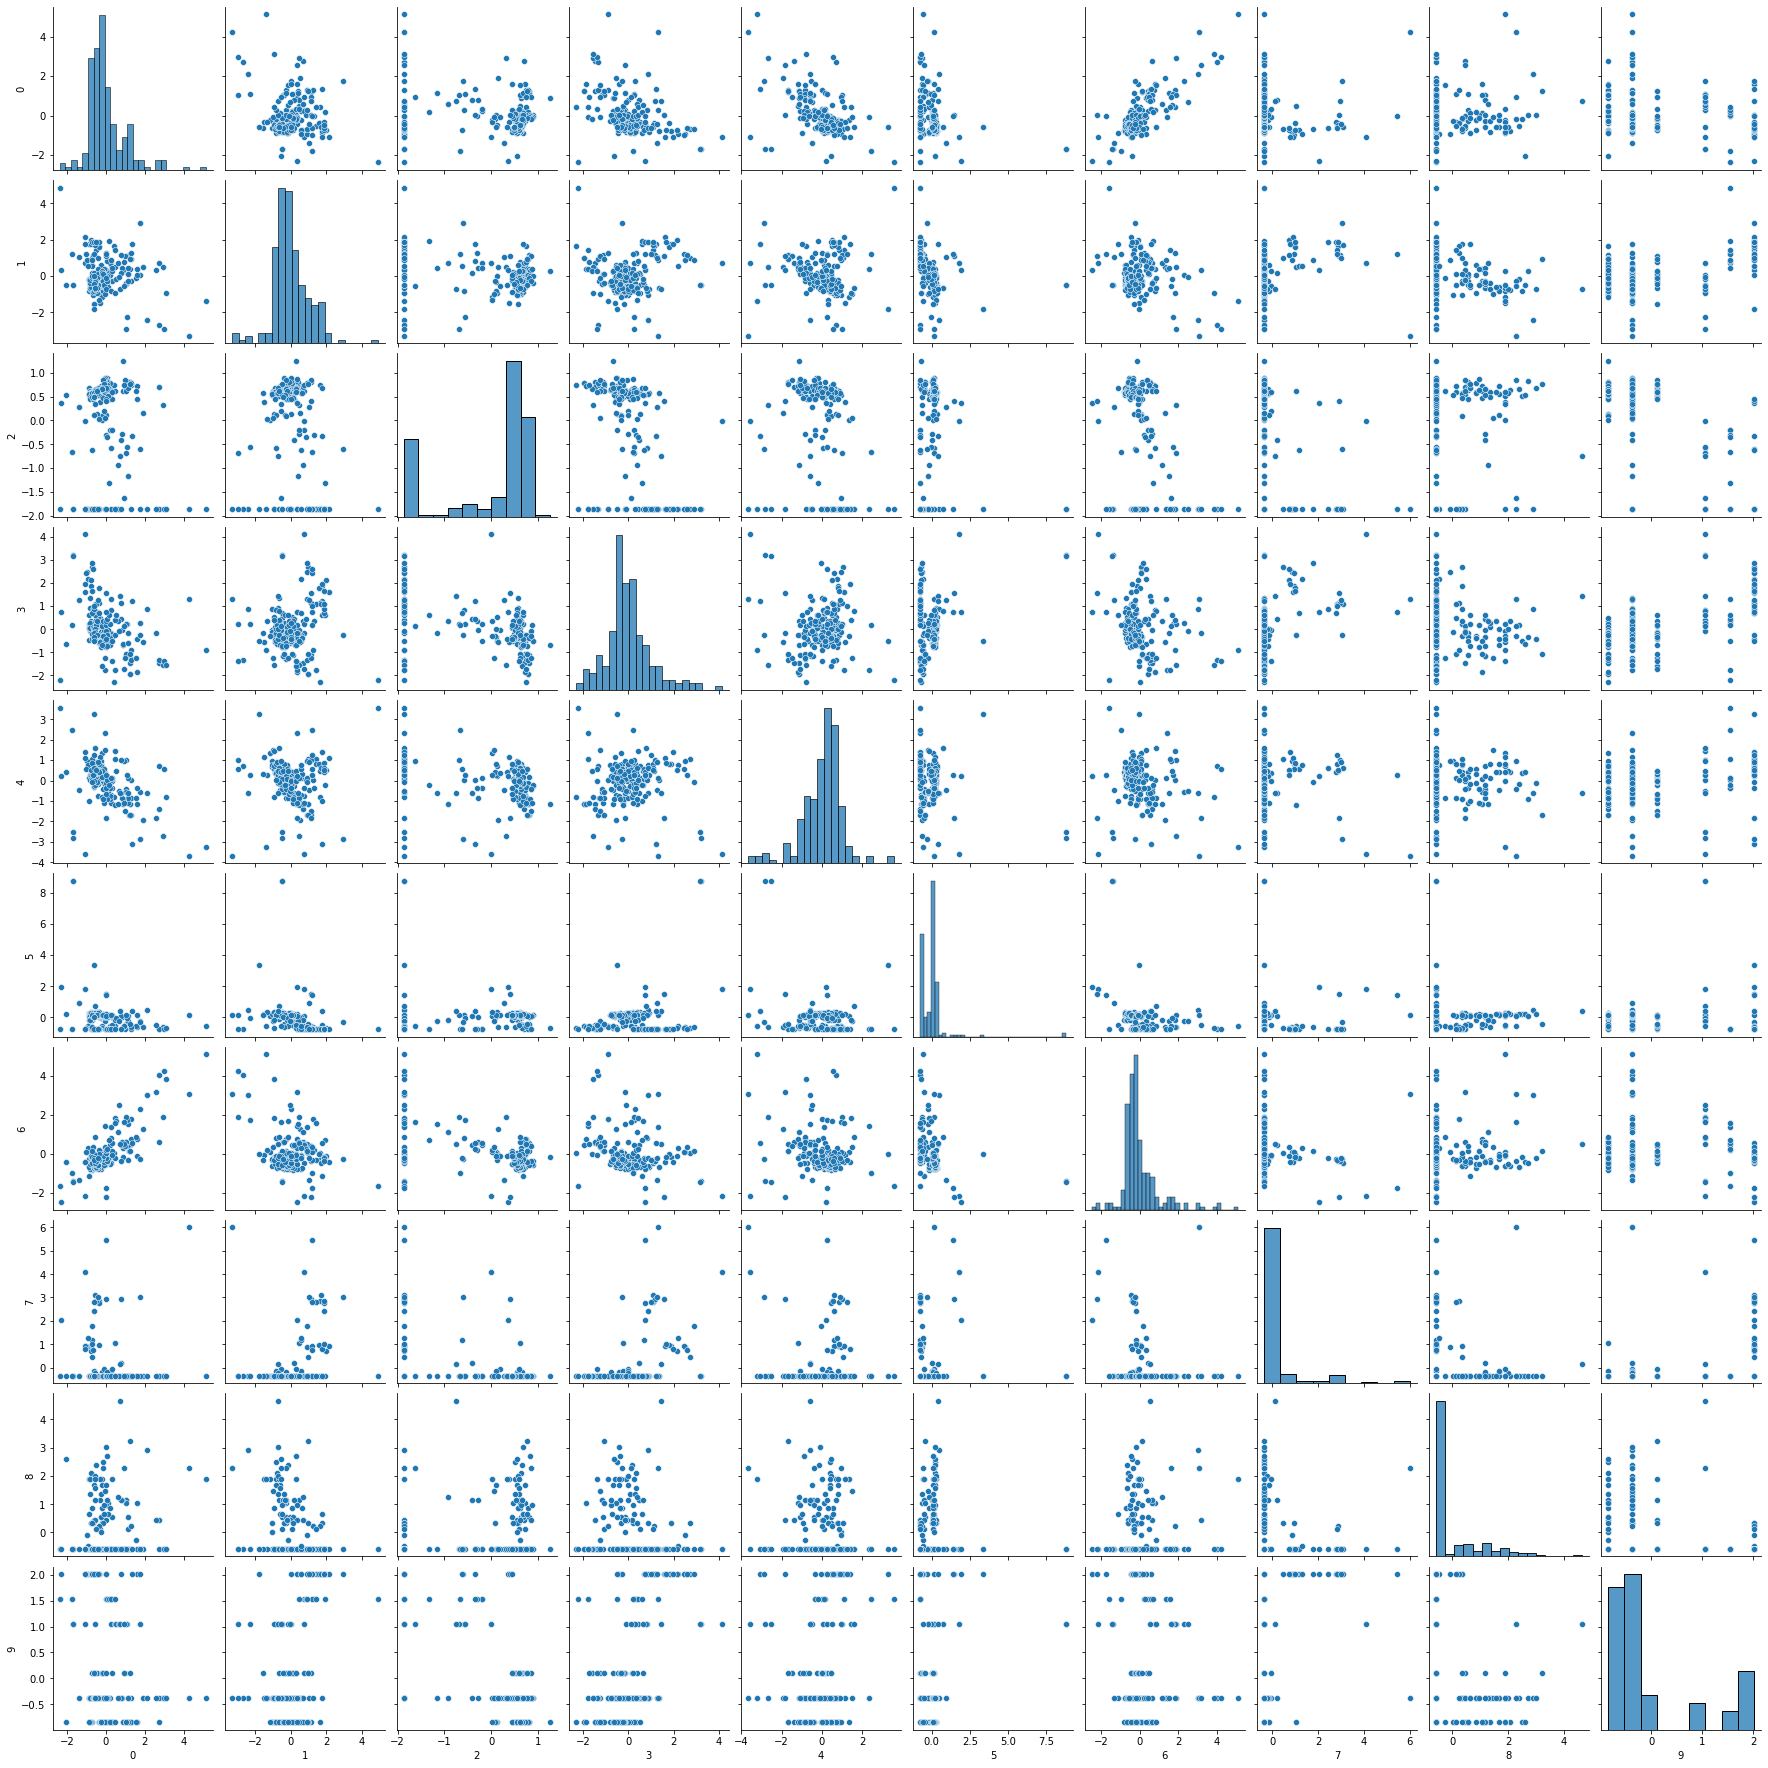

In [33]:
import seaborn as sns
sns.pairplot(pd.DataFrame(glass_normal))

<AxesSubplot:>

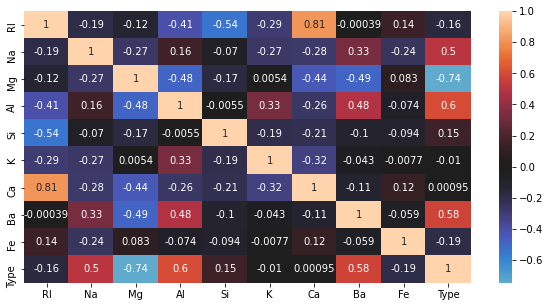

In [35]:
import matplotlib.pyplot as plt 
%matplotlib inline
corr=glass.corr()
top_features=corr.index
plt.figure(figsize=(10,5))
sns.heatmap(glass[top_features].corr(),annot=True, center=0)

In [ ]:
# Seems RI and Ca are correlated and ca may not be contributing significantly. Decided to drop  ca from the data frame.

In [37]:
glass1=glass.drop(['Ca'],axis=1)
glass1

,RI,Na,Mg,Al,Si,K,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,1.57,0.0,7


In [38]:
glass1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ba      214 non-null    float64
 7   Fe      214 non-null    float64
 8   Type    214 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 15.2 KB


In [44]:
glass1.head()

,RI,Na,Mg,Al,Si,K,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,0.0,0.0,1


In [45]:
array = glass1.values
X = array[:, 0:8]
Y = array[:, 8]

In [46]:
X

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.06   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.48   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.39   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  0.     ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  0.     ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  0.     ,  1.67   ,  0.     ]])

In [47]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7.])

In [48]:
num_folds = 10
kfold = KFold(n_splits=10)

In [49]:
model = KNeighborsClassifier(n_neighbors=12)
results = cross_val_score(model, X, Y, cv=kfold)

In [14]:
print(results.mean())

0.42878787878787883


In [ ]:
#Gridsearch Algorithm Tunig

In [50]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [51]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [52]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [53]:
print(grid.best_score_)
print(grid.best_params_)

0.6406423034330011
{'n_neighbors': 1}


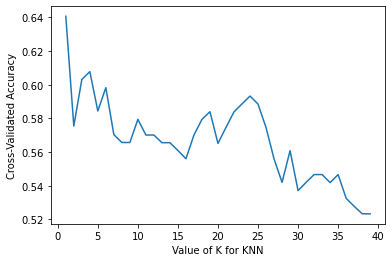

In [69]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 40
k_range = range(1, 40)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

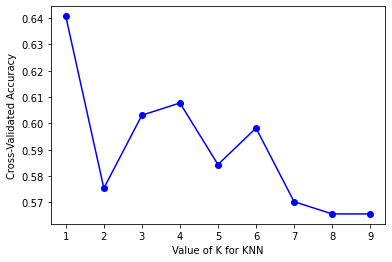

In [70]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 10
k_range = range(1, 10)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores,"bo-")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
# Looks like with k=1  accuracy stands at 64% and then descends and again reaches a peak when K value =4

In [71]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 45)

In [72]:
from sklearn.model_selection import LeaveOneOut

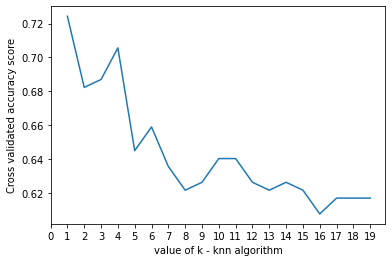

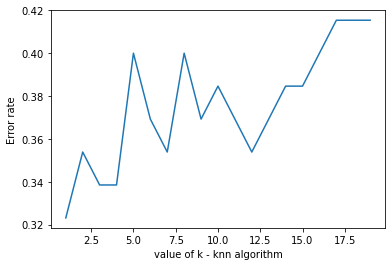

In [74]:
#Alternate method to find  Accuracy and error with Euclidean distance 
# Using Euclidean Distance
k_range = range(1,20)
k_scores = []
error_rate =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #kscores - accuracy
    loocv = LeaveOneOut()
    scores = cross_val_score(knn,X,Y,cv=loocv,scoring='accuracy')
    k_scores.append(scores.mean())
    
    #error rate
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))

#plot k vs accuracy
plt.plot(k_range,k_scores)
plt.xlabel('value of k - knn algorithm')
plt.xticks(np.arange(0, 20, 1.0))
plt.ylabel('Cross validated accuracy score')
plt.show()

#plot k vs error rate
plt.plot(k_range,error_rate)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Error rate')
plt.show()

In [ ]:
#Seems  Kvalue of 4 gives  good accuracy with less error percentage

In [90]:
model1=KNeighborsClassifier(n_neighbors=4,metric='euclidean')
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
results=(np.mean(y_pred==y_test))
print(results)

0.6615384615384615


In [91]:
model1=KNeighborsClassifier(n_neighbors=4,metric='euclidean')
model1.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [93]:
ytrain_pred=model1.predict(x_train)
ytest_pred=model1.predict(x_test)

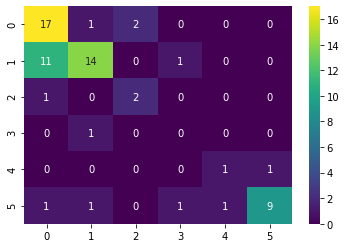

Test Results 
               precision    recall  f1-score   support

         1.0       0.57      0.85      0.68        20
         2.0       0.82      0.54      0.65        26
         3.0       0.50      0.67      0.57         3
         5.0       0.00      0.00      0.00         1
         6.0       0.50      0.50      0.50         2
         7.0       0.90      0.69      0.78        13

    accuracy                           0.66        65
   macro avg       0.55      0.54      0.53        65
weighted avg       0.72      0.66      0.67        65

Train Results 
               precision    recall  f1-score   support

         1.0       0.72      0.94      0.82        50
         2.0       0.80      0.78      0.79        50
         3.0       1.00      0.36      0.53        14
         5.0       1.00      0.67      0.80        12
         6.0       0.86      0.86      0.86         7
         7.0       0.87      0.81      0.84        16

    accuracy                           0.79   

In [94]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
sns.heatmap(confusion_matrix(y_test,ytest_pred),annot=True,cmap='viridis')
plt.show()
print("Test Results",'\n',classification_report(y_test,ytest_pred))
print("Train Results",'\n',classification_report(y_train,ytrain_pred))

In [95]:
accuracy_score(y_test,ytest_pred)

0.6615384615384615

In [96]:
model2=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
model2.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [97]:
ytrain_pred=model2.predict(x_train)
ytest_pred=model2.predict(x_test)

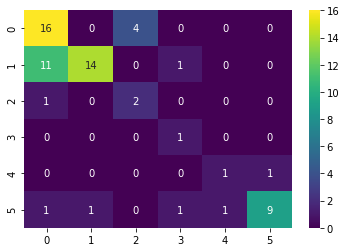

Test Results 
               precision    recall  f1-score   support

         1.0       0.55      0.80      0.65        20
         2.0       0.93      0.54      0.68        26
         3.0       0.33      0.67      0.44         3
         5.0       0.33      1.00      0.50         1
         6.0       0.50      0.50      0.50         2
         7.0       0.90      0.69      0.78        13

    accuracy                           0.66        65
   macro avg       0.59      0.70      0.59        65
weighted avg       0.76      0.66      0.67        65

Train Results 
               precision    recall  f1-score   support

         1.0       0.75      0.90      0.82        50
         2.0       0.84      0.84      0.84        50
         3.0       0.88      0.50      0.64        14
         5.0       1.00      0.92      0.96        12
         6.0       1.00      0.86      0.92         7
         7.0       0.93      0.81      0.87        16

    accuracy                           0.83   

In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
sns.heatmap(confusion_matrix(y_test,ytest_pred),annot=True,cmap='viridis')
plt.show()
print("Test Results",'\n',classification_report(y_test,ytest_pred))
print("Train Results",'\n',classification_report(y_train,ytrain_pred))

In [99]:
accuracy_score(y_test,ytest_pred)

0.6615384615384615

In [ ]:
# On comparison with Kvalue 3 and kvalue 4 - Test accuracy/Train accuracy  seems to be better for Kvalue 4